In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier


from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [45]:
df1=pd.read_csv('ProductDetails.csv')
df1

,ProductKey,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal
0,30437,13194,80445,28611,DOM,False
1,68587,13194,80445,28611,DOM,False
2,46645,13194,80445,28611,DOM,False
3,49343,13194,80445,28611,DOM,False
4,64223,13194,80445,28611,DOM,False
...,...,...,...,...,...,...
77367,62220,66805,75452,9740,DI,False
77368,53837,66805,75452,9740,DI,False
77369,28091,66805,75452,6840,DI,False
77370,1234,15011,75452,9740,DI,False


In [46]:
df2=pd.read_csv('CatalogueDiscontinuation.csv')
df2

,CatEdition,SpringSummer,ProductKey,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,89,True,8108,-11,RI,43.99,250.545,248.642,False
1,89,True,8108,-10,RI,43.99,255.700,244.333,False
2,89,True,8108,-9,RI,43.99,206.111,252.187,False
3,89,True,8108,-8,RI,43.99,188.625,254.764,False
4,89,True,8108,-7,RI,43.99,169.142,249.000,False
...,...,...,...,...,...,...,...,...,...
3625654,89,True,8108,-16,RI,43.99,633.750,0.000,False
3625655,89,True,8108,-15,RI,43.99,564.000,178.200,False
3625656,89,True,8108,-14,RI,43.99,539.214,236.363,False
3625657,89,True,8108,-13,RI,43.99,346.692,251.166,False


In [4]:
df = pd.merge(df1, df2, on = 'ProductKey')
df

,ProductKey,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,CatEdition,SpringSummer,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,30437,13194,80445,28611,DOM,False,93,True,-18,RO,6.0,1.277,0.000,True
1,30437,13194,80445,28611,DOM,False,93,True,-17,RO,6.0,1.470,0.000,True
2,30437,13194,80445,28611,DOM,False,93,True,-16,RO,6.0,1.562,0.000,True
3,30437,13194,80445,28611,DOM,False,93,True,-15,RO,6.0,1.666,0.000,True
4,30437,13194,80445,28611,DOM,False,93,True,-14,RO,6.0,1.785,0.000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625654,65087,15011,75452,6840,DI,False,92,False,-5,RO,7.0,80.200,80.850,True
3625655,65087,15011,75452,6840,DI,False,92,False,-4,RO,7.0,74.750,78.619,True
3625656,65087,15011,75452,6840,DI,False,92,False,-3,RO,7.0,70.333,76.590,True
3625657,65087,15011,75452,6840,DI,False,92,False,-2,RO,7.0,70.000,75.391,True


In [5]:
df.head(10)

,ProductKey,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,CatEdition,SpringSummer,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,30437,13194,80445,28611,DOM,False,93,True,-18,RO,6.0,1.277,0.000,True
1,30437,13194,80445,28611,DOM,False,93,True,-17,RO,6.0,1.470,0.000,True
2,30437,13194,80445,28611,DOM,False,93,True,-16,RO,6.0,1.562,0.000,True
3,30437,13194,80445,28611,DOM,False,93,True,-15,RO,6.0,1.666,0.000,True
4,30437,13194,80445,28611,DOM,False,93,True,-14,RO,6.0,1.785,0.000,True
5,30437,13194,80445,28611,DOM,False,93,True,-13,RO,6.0,1.923,0.000,True
6,30437,13194,80445,28611,DOM,False,93,True,-12,RO,6.0,2.000,0.000,True
7,30437,13194,80445,28611,DOM,False,93,True,-11,RO,6.0,0.727,0.000,True
8,30437,13194,80445,28611,DOM,False,93,True,-10,RO,6.0,0.500,0.000,True
9,30437,13194,80445,28611,DOM,False,93,True,-8,RO,6.0,0.500,0.058,True


**Finding out any missing and duplicate values**

In [6]:
def missing_duplicate_values(x):
    print('Null values:\n')
    print(x.isnull().sum(),'\n')
    print('*'*50)
    print('Duplicated values =', x.duplicated().sum())
    
missing_duplicate_values(df)

Null values:

ProductKey         0
Supplier           0
HierarchyLevel1    0
HierarchyLevel2    0
DIorDOM            0
Seasonal           0
CatEdition         0
SpringSummer       0
WeeksOut           0
Status             0
SalePriceIncVAT    0
ForecastPerWeek    0
ActualsPerWeek     0
DiscontinuedTF     0
dtype: int64 

**************************************************
Duplicated values = 0


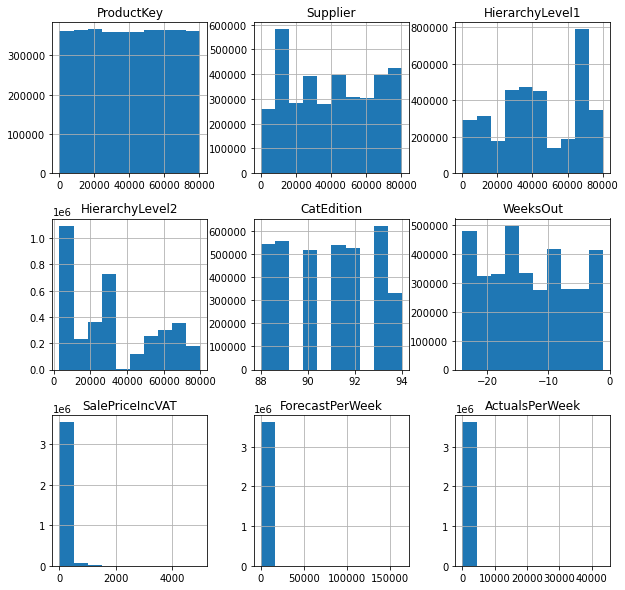

In [7]:
df.hist(bins=10,figsize=(10,10))   #Histrogram of each coloumn
plt.show()

<AxesSubplot:>

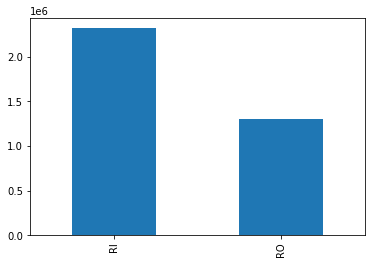

In [8]:
df['Status'].value_counts().plot(kind = 'bar')  #i find RI and RO values to perdict the model better beacause they don't have balance figures

<AxesSubplot:>

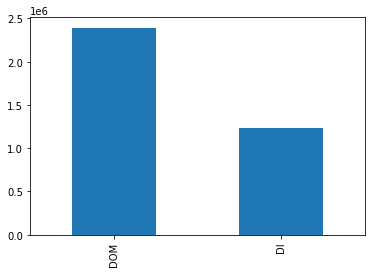

In [9]:
df['DIorDOM'].value_counts().plot(kind = 'bar')

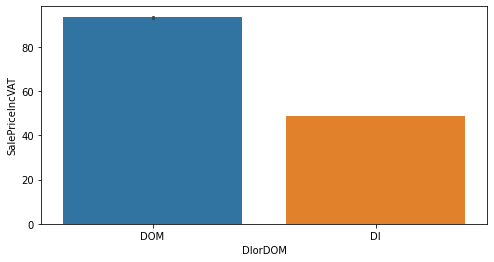

In [10]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x="DIorDOM", y="SalePriceIncVAT", data=df)

<AxesSubplot:xlabel='ActualsPerWeek'>

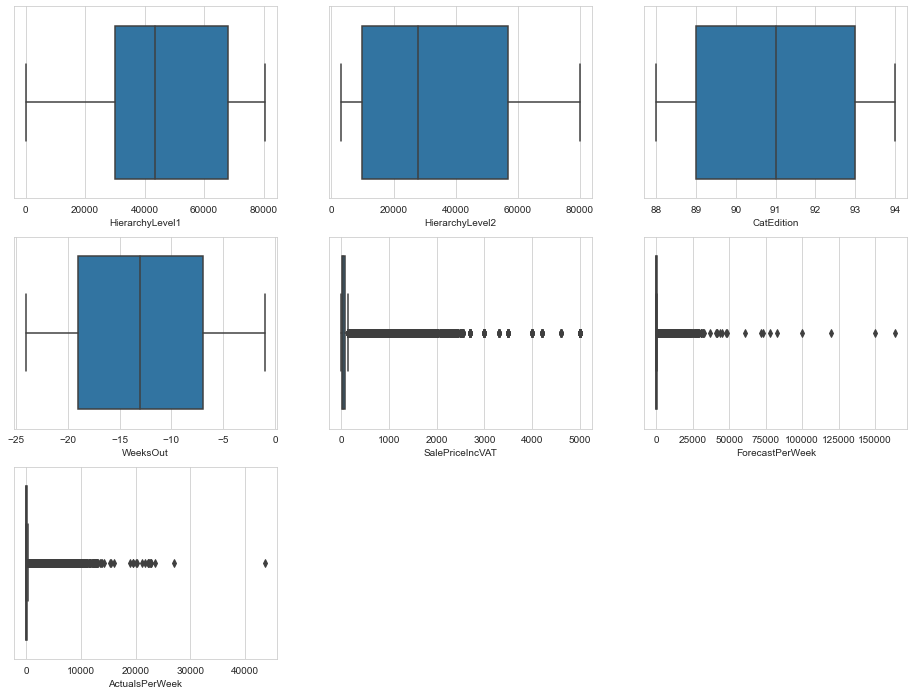

In [11]:
plt.figure(figsize=(16,12))

sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='HierarchyLevel1',data=df)

plt.subplot(3,3,2)
sns.boxplot(x='HierarchyLevel2',data=df)

plt.subplot(3,3,3)
sns.boxplot(x='CatEdition',data=df)

plt.subplot(3,3,4)
sns.boxplot(x='WeeksOut',data=df)

plt.subplot(3,3,5)
sns.boxplot(x='SalePriceIncVAT',data=df)

plt.subplot(3,3,6)
sns.boxplot(x='ForecastPerWeek',data=df)

plt.subplot(3,3,7)
sns.boxplot(x='ActualsPerWeek',data=df)    
# Box plot clearly says that the columns SalePriceIncVAT, ForecastPerWeek and ActualsPerWeek have many outliers

In [12]:
# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof

**Feature Transformation**

In [13]:
def assigning_values(x):
    if x == 'DOM':
        return 1
    elif x == 'DI':
        return 2
    
df['DIorDOM']= df['DIorDOM'].map(assigning_values)
df['DIorDOM'].head()


0    1
1    1
2    1
3    1
4    1
Name: DIorDOM, dtype: int64

In [14]:
df['Seasonal']= df['Seasonal'].astype(int)
df['SpringSummer']= df['SpringSummer'].astype(int)
df['DiscontinuedTF']= df['DiscontinuedTF'].astype(int)
df

,ProductKey,Supplier,HierarchyLevel1,HierarchyLevel2,DIorDOM,Seasonal,CatEdition,SpringSummer,WeeksOut,Status,SalePriceIncVAT,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,30437,13194,80445,28611,1,0,93,1,-18,RO,6.0,1.277,0.000,1
1,30437,13194,80445,28611,1,0,93,1,-17,RO,6.0,1.470,0.000,1
2,30437,13194,80445,28611,1,0,93,1,-16,RO,6.0,1.562,0.000,1
3,30437,13194,80445,28611,1,0,93,1,-15,RO,6.0,1.666,0.000,1
4,30437,13194,80445,28611,1,0,93,1,-14,RO,6.0,1.785,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625654,65087,15011,75452,6840,2,0,92,0,-5,RO,7.0,80.200,80.850,1
3625655,65087,15011,75452,6840,2,0,92,0,-4,RO,7.0,74.750,78.619,1
3625656,65087,15011,75452,6840,2,0,92,0,-3,RO,7.0,70.333,76.590,1
3625657,65087,15011,75452,6840,2,0,92,0,-2,RO,7.0,70.000,75.391,1


In [15]:
df['DiscontinuedTF'].value_counts()

0    2186167
1    1439492
Name: DiscontinuedTF, dtype: int64

In [16]:
def predicted_values(x):
    if x == 'RI':
        return 1
    elif x == 'RO':
        return 0
    
df['Status']= df['Status'].map(predicted_values)
df['Status'].head()

0    0
1    0
2    0
3    0
4    0
Name: Status, dtype: int64

<AxesSubplot:>

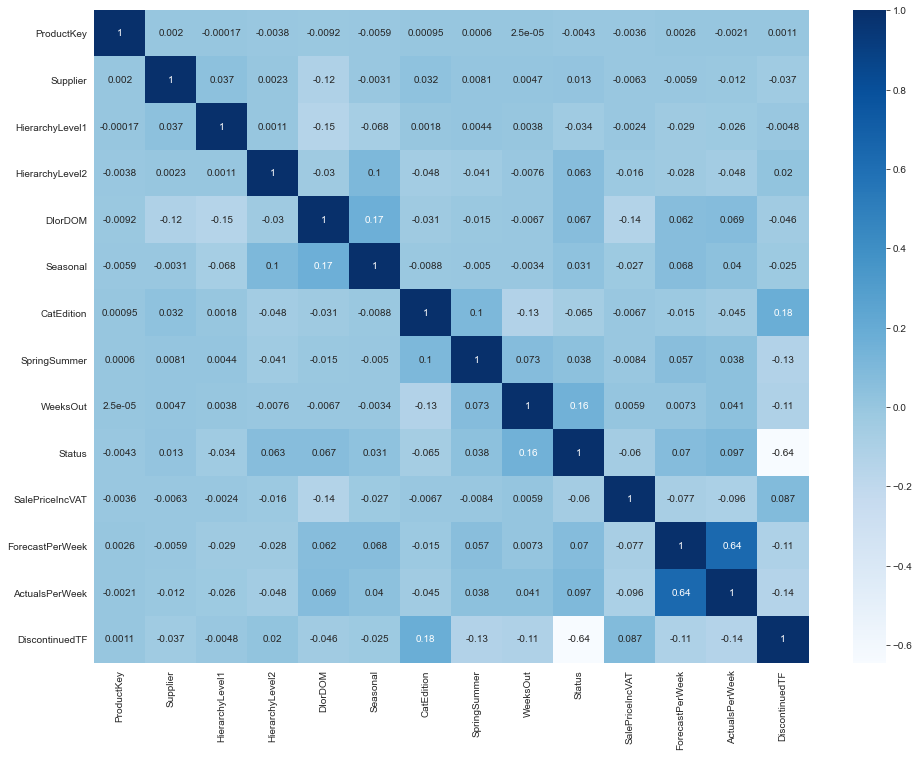

In [17]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True,cmap="Blues")  #the target coloumn has the strong corelation with status 64%

**Baseline Accuracy**

In [18]:
X = df[df.columns[:-1]].values
y = df['DiscontinuedTF'].values  #baseline accuary is a dummy classifier 

In [19]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
print("the baseline accuracy is",dummy_clf.score(X, y))


the baseline accuracy is 0.6029709357664358


**Splitting the data**

In [20]:
from sklearn.model_selection import train_test_split
seed = 1000
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)  #train & test data set 

**Data Normalisation**

In [21]:
scaled = MinMaxScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

#mixmax scalar because non of the graph that has the bell curve 



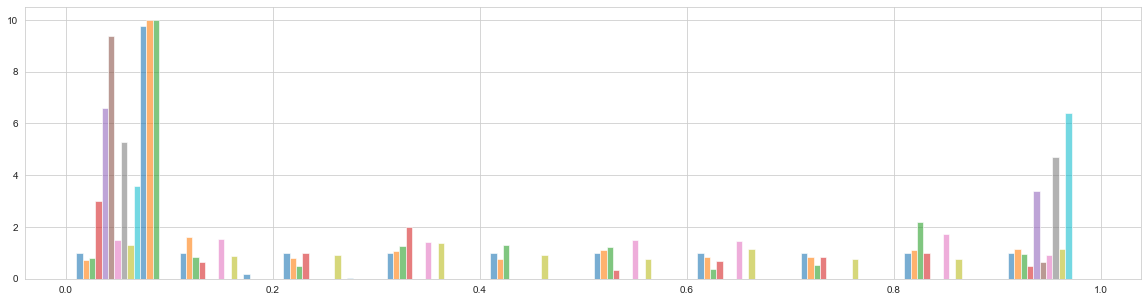

In [22]:
plt.figure(figsize= (20,5))
plt.hist(X_train, density=True, alpha=0.6)
  
plt.show()

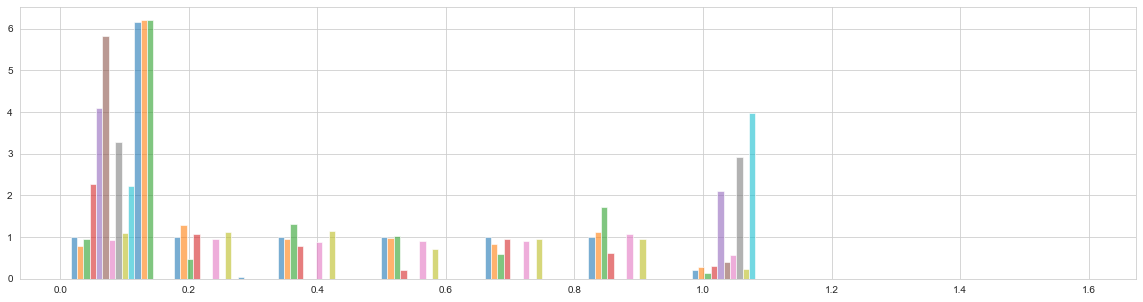

In [23]:
plt.figure(figsize= (20,5))
plt.hist(X_test, density=True, alpha=0.6)
  
plt.show()

**Model Creation**

In [24]:

model = XGBClassifier()
model.fit(X_train, y_train)     #XGB Classifier

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<BarContainer object of 13 artists>

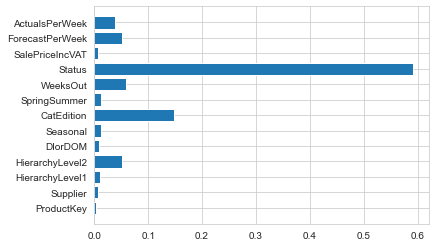

In [25]:
plt.barh(df.columns[:-1], model.feature_importances_)  #horizontal bar plot to visualize the important feature of a machine learning model


In [26]:
y_train_XG = model.predict(X_train)
print('Accuracy score for training data (XG)', accuracy_score(y_train,y_train_XG))
y_pred_XG = model.predict(X_test)
XG_Score = accuracy_score(y_test, y_pred_XG)
print("Accuracy score for testing data (XG): ", XG_Score)
XG_model = confusion_matrix(y_test, y_pred_XG)
print("Test Classification Report for model XG \n",classification_report(y_test, y_pred_XG))
print('*'*100)

Accuracy score for training data (XG) 0.952930967372481
Accuracy score for testing data (XG):  0.9522335243790097
Test Classification Report for model XG 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    436984
           1       0.95      0.93      0.94    288148

    accuracy                           0.95    725132
   macro avg       0.95      0.95      0.95    725132
weighted avg       0.95      0.95      0.95    725132

****************************************************************************************************


Text(0.5, 1.0, 'XG Boosting')

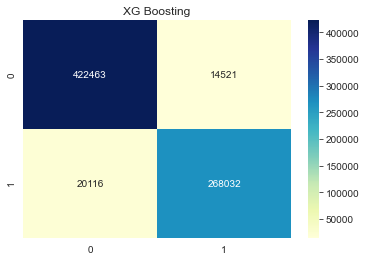

In [27]:
sns.heatmap(pd.DataFrame(XG_model), annot = True,cmap="YlGnBu" ,fmt='g').set_title('XG Boosting')  



**Removal of outliers**

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)                             #removal of outliners

ProductKey         40369.000
Supplier           42707.000
HierarchyLevel1    38094.000
HierarchyLevel2    47180.000
DIorDOM                1.000
Seasonal               0.000
CatEdition             4.000
SpringSummer           1.000
WeeksOut              12.000
Status                 1.000
SalePriceIncVAT       54.000
ForecastPerWeek      111.918
ActualsPerWeek       100.278
DiscontinuedTF         1.000
dtype: float64


In [29]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]  #shape of dataset before and after outliners
print(f'Before: {df.shape}, After: {df_out.shape}')

Before: (3625659, 14), After: (2611039, 14)


In [30]:
df_out['DiscontinuedTF'].value_counts() #count of discontinuedTF coloumn

0    1540490
1    1070549
Name: DiscontinuedTF, dtype: int64

In [31]:
df_out['DiscontinuedTF'].value_counts()/len(df_out)*100  #caluculating the percentage of discountinuedTF

0    58.999119
1    41.000881
Name: DiscontinuedTF, dtype: float64

In [32]:
df_out.columns

Index(['ProductKey', 'Supplier', 'HierarchyLevel1', 'HierarchyLevel2',
       'DIorDOM', 'Seasonal', 'CatEdition', 'SpringSummer', 'WeeksOut',
       'Status', 'SalePriceIncVAT', 'ForecastPerWeek', 'ActualsPerWeek',
       'DiscontinuedTF'],
      dtype='object')

**Removed all the non important features**


In [33]:
new_df = df_out[['HierarchyLevel2','CatEdition', 'WeeksOut','Status', 'ForecastPerWeek', 'ActualsPerWeek','DiscontinuedTF']]
new_df.shape

(2611039, 7)

In [34]:
new_df    #after removing non important features in dataset

,HierarchyLevel2,CatEdition,WeeksOut,Status,ForecastPerWeek,ActualsPerWeek,DiscontinuedTF
0,28611,93,-18,0,1.277,0.000,1
1,28611,93,-17,0,1.470,0.000,1
2,28611,93,-16,0,1.562,0.000,1
3,28611,93,-15,0,1.666,0.000,1
4,28611,93,-14,0,1.785,0.000,1
...,...,...,...,...,...,...,...
3625654,6840,92,-5,0,80.200,80.850,1
3625655,6840,92,-4,0,74.750,78.619,1
3625656,6840,92,-3,0,70.333,76.590,1
3625657,6840,92,-2,0,70.000,75.391,1


Accuracy score for training data (XG) 0.9475022153539467
Accuracy score for testing data (XG):  0.9476262332250751
Test Classification Report for model XG 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    307655
           1       0.95      0.92      0.94    214553

    accuracy                           0.95    522208
   macro avg       0.95      0.94      0.95    522208
weighted avg       0.95      0.95      0.95    522208

****************************************************************************************************


Text(0.5, 1.0, 'XG Boosting')

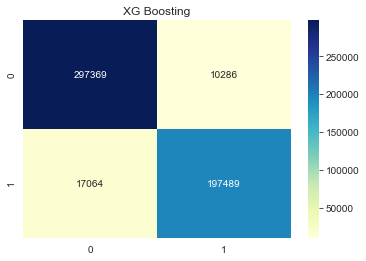

In [35]:
X = new_df[new_df.columns[:-1]].values
y = new_df['DiscontinuedTF'].values

seed = 1000
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

scaled = MinMaxScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)


model = XGBClassifier()
model.fit(X_train, y_train)


y_train_XG = model.predict(X_train)
print('Accuracy score for training data (XG)', accuracy_score(y_train,y_train_XG))
y_pred_XG = model.predict(X_test)
XG_Score = accuracy_score(y_test, y_pred_XG)
print("Accuracy score for testing data (XG): ", XG_Score)
XG_model = confusion_matrix(y_test, y_pred_XG)
print("Test Classification Report for model XG \n",classification_report(y_test, y_pred_XG))
print('*'*100)

sns.heatmap(pd.DataFrame(XG_model), annot = True,cmap="YlGnBu" ,fmt='g').set_title('XG Boosting')



Accuracy score for training data before removal of outliers (XG) 0.9233542732062139


Accuracy score for testing data before removal of outliers (XG) 0.9234884131440896

Accuracy score for training data after removal of outliers(XG) 0.9257029410229932

Accuracy score for testing data after removal of outliers(XG):  0.9266843862981801 

In [36]:
df = new_df.sample(n = 5000)
df['DiscontinuedTF'].value_counts()/len(df)*100

0    58.84
1    41.16
Name: DiscontinuedTF, dtype: float64

In [37]:
X = df[df.columns[:-1]].values
y = df['DiscontinuedTF'].values

seed = 1000
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

scaled = MinMaxScaler()
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

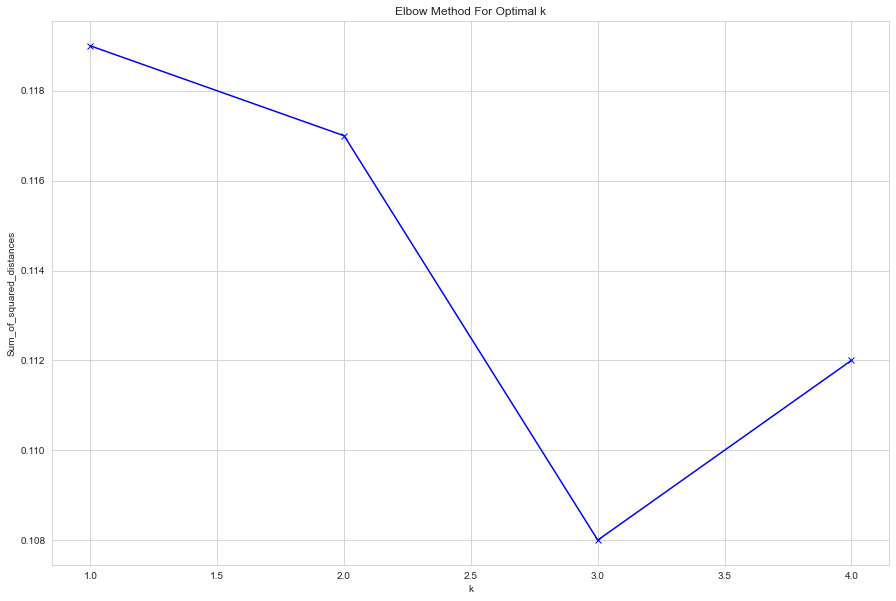

In [38]:
error_rate = []

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,5),error_rate,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [39]:
def Voting_classifier(X_train,X_test,y_train,y_test):
   
    
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train, y_train)
    y_train_knn = knn_model.predict(X_train)
    print('Accuracy score for training data (KNN)', accuracy_score(y_train,y_train_knn))
    y_pred_knn = knn_model.predict(X_test)
    knn_score = accuracy_score(y_test, y_pred_knn)
    print("Accuracy score for testing data (KNN): ", knn_score)
    knn_Cm = confusion_matrix(y_test, y_pred_knn)
    print("Test Classification Report for model KNN \n",classification_report(y_test, y_pred_knn))
    print('*'*100)
    
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    y_train_log = log_model.predict(X_train)
    print('Accuracy score for training data (log)', accuracy_score(y_train,y_train_log))
    y_pred_log = log_model.predict(X_test)
    log_score = accuracy_score(y_test, y_pred_log)
    print("Accuracy score for testing data (log): ", log_score)
    LR_CM= confusion_matrix(y_test, y_pred_log)
    print("Test Classification Report for model LG \n",classification_report(y_test, y_pred_log))
    print('*'*100)

    rf_model= RandomForestClassifier(max_depth=2, random_state=0)
    rf_model.fit(X_train, y_train)
    y_train_rf = rf_model.predict(X_train)
    print('Accuracy score for training data (rff)', accuracy_score(y_train,y_train_rf))
    y_pred_rf = rf_model.predict(X_test)
    rf_score = accuracy_score(y_test, y_pred_rf)
    print("Accuracy score for testing data (Randon Forest): ", rf_score)
    RF_CM =confusion_matrix(y_test, y_pred_rf)
    print("Test Classification Report for model RF \n",classification_report(y_test, y_pred_rf))
    print('*'*100)
    
    svm_model = svm.SVC(kernel='linear',probability = True)
    svm_model.fit(X_train, y_train)
    y_train_svm = svm_model.predict(X_train)
    print('Accuracy score for training data (SVM)', accuracy_score(y_train,y_train_svm))
    y_pred_svm = svm_model.predict(X_test)
    svm_score = accuracy_score(y_test, y_pred_svm)
    print("Accuracy score testing data (SVM): ", svm_score)
    SVM_CM = confusion_matrix(y_test, y_pred_svm)
    print("Test Classification Report for model SVM \n",classification_report(y_test, y_pred_svm))
    print('*'*100)

    #create a dictionary of the models
    estimators=[('knn', knn_model), ('rf', log_model), ('log_reg', rf_model),('svm',svm_model)]
    #create the voting classifier, inputting the models
    ensemble = VotingClassifier(estimators, voting='soft')
    #fit model to training data
    ensemble.fit(X_train, y_train)
    #test the model on the test data

    Voting_prediction = ensemble.predict(X_test)
    y_train_voting = ensemble.predict(X_train)
    print('Accuracy score for training data (Voting_model) without Grid search', accuracy_score(y_train,y_train_voting))
    Voting_final = accuracy_score(y_test, Voting_prediction)
    print("Accuracy score for testing data (Voting_model) without Grid search: ", Voting_final)   
    Voting_accuracy_matrix = confusion_matrix(y_test, Voting_prediction)
    sns.heatmap(pd.DataFrame(Voting_accuracy_matrix), annot = True,cmap="YlGnBu" ,fmt='g').set_title('Voting_Classifier')
    print("Test Classification Report for model Voting \n",classification_report(y_test, Voting_prediction)) 
    plot_roc_curve(ensemble, X_test, y_test)




Accuracy score for training data (KNN) 0.9345
Accuracy score for testing data (KNN):  0.892
Test Classification Report for model KNN 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       582
           1       0.90      0.83      0.87       418

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.89      0.89      0.89      1000

****************************************************************************************************
Accuracy score for training data (log) 0.8325
Accuracy score for testing data (log):  0.843
Test Classification Report for model LG 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       582
           1       0.85      0.75      0.80       418

    accuracy                           0.84      1000
   macro avg       0.85      0.83      0.84      1000
weighted avg       0.84      0.

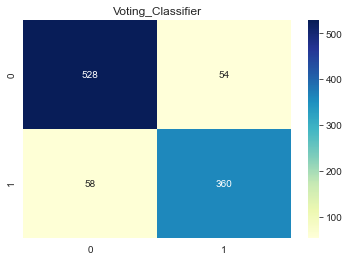

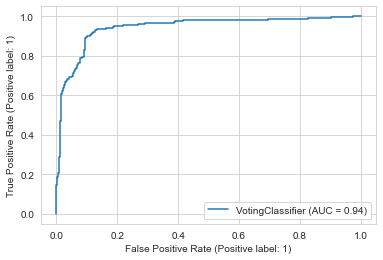

In [40]:
Voting_classifier(X_train,X_test,y_train,y_test)

In [41]:
def Grid_voting_classifier(X_train,X_test,y_train,y_test):
    
    global GridSearchCV
    
    knn = KNeighborsClassifier()#create a dictionary of all values we want to test for n_neighbors
    params_knn = {'n_neighbors': np.arange(1, 5)}#use gridsearch to test all values for n_neighbors
    knn_gs = GridSearchCV(knn, params_knn, cv=5)#fit model to training data
    knn_gs.fit(X_train, y_train)

    knn_best = knn_gs.best_estimator_

    print('Best k value for',knn_gs.best_params_)
    
    rf = RandomForestClassifier()
    #create a dictionary of all values we want to test for n_estimators
    params_rf = {'n_estimators': [50, 100,200,250,300,350,400]}
    #use gridsearch to test all values for n_estimators
    rf_gs = GridSearchCV(rf, params_rf, cv=5)#fit model to training data
    rf_gs.fit(X_train, y_train)

    #save best model
    rf_best = rf_gs.best_estimator_
    #check best n_estimators value
    print(rf_gs.best_params_)
    
    from sklearn.model_selection import GridSearchCV
    log_reg = LogisticRegression()
    grid_values = {'C':[0.001,.009,0.01,.09,1,5,10,25,50,70]}
    log_reg = GridSearchCV(log_reg, param_grid = grid_values,scoring = 'recall')
    log_reg.fit(X_train, y_train)

    print('Best Estimators: %s' % log_reg.best_estimator_)
    print('Best Score: %s' % log_reg.best_score_)

    best_log_reg = log_reg.best_estimator_
    
    param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'poly', 'sigmoid']}
    svm_grid = GridSearchCV(SVC(probability=True),param_grid,refit=True,verbose=2)
    svm_grid.fit(X_train,y_train)
    
    import pickle
    pickle.dump(svm_grid, open('svm_grid_model.pkl','wb'))
    print("dumping complete")
    
    print(svm_grid.best_estimator_)
    svm_grid= svm_grid.best_estimator_
  

    estimators=[('knn', knn_best), ('rf', rf_best), ('log_reg', best_log_reg),('svm',svm_grid)]
    #create our voting classifier, inputting our models
    ensemble = VotingClassifier(estimators, voting='soft')
    #fit model to training data
    ensemble.fit(X_train, y_train)
    #test our model on the test data

    Voting_prediction = ensemble.predict(X_test)

    Voting_final = accuracy_score(y_test, Voting_prediction)
    print("Accuracy score after grid search(Voting_model): ", Voting_final)
    
    Voting_accuracy_matrix = confusion_matrix(y_test, Voting_prediction)
    Voting_accuracy_matrix
    
    sns.heatmap(pd.DataFrame(Voting_accuracy_matrix), annot = True,cmap="YlGnBu" ,fmt='g').set_title('Voting_Classifier')
    plot_roc_curve(ensemble, X_test, y_test)

Best k value for {'n_neighbors': 4}
{'n_estimators': 100}
Best Estimators: LogisticRegression(C=0.01)
Best Score: 0.75
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   2.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.9s
[CV] END 

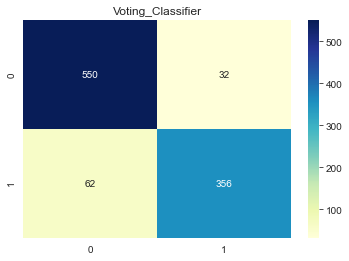

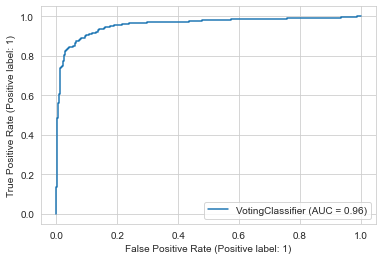

In [42]:
Grid_voting_classifier(X_train,X_test,y_train,y_test)